In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import StackingRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import kagglehub



c:\Projects\DataSci\.mlws\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:

# Load dataset (example: historical ticket pricing data)
path = kagglehub.dataset_download("ibrahimelsayed182/plane-ticket-price")
print("Path to dataset files:", path)
data_path = fr'{path}\ticket_pricing_data.csv'
data = pd.read_csv(r'C:\Users\Alex\.cache\kagglehub\datasets\ibrahimelsayed182\plane-ticket-price\versions\1\Data_Train.csv')

Path to dataset files: C:\Users\Alex\.cache\kagglehub\datasets\ibrahimelsayed182\plane-ticket-price\versions\1


In [3]:

# Ensure correct data types
data['Date_of_Journey'] = pd.to_datetime(data['Date_of_Journey'])
data['Day_of_Week'] = data['Date_of_Journey'].dt.dayofweek
data['Month'] = data['Date_of_Journey'].dt.month
data['Day'] = data['Date_of_Journey'].dt.day

# Feature engineering
# Convert 'Duration' to total minutes
def duration_to_minutes(duration):
    parts = duration.split()
    hours = 0
    minutes = 0
    for part in parts:
        if 'h' in part:
            hours = int(part.replace('h', ''))
        elif 'm' in part:
            minutes = int(part.replace('m', ''))
    return hours * 60 + minutes

data['Duration_Minutes'] = data['Duration'].apply(duration_to_minutes)

# Drop original 'Duration' column
data = data.drop(columns=['Duration'])

# Define features and target
X = data.drop(columns=['Price'])  # Features
y = data['Price']  # Target variable

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipeline
categorical_features = ['Airline', 'Source', 'Destination', 'Route', 'Additional_Info', 'Total_Stops']
numerical_features = ['Day_of_Week', 'Month', 'Day', 'Duration_Minutes']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', StandardScaler(), numerical_features)
    ]
)



C:\Users\Alex\AppData\Local\Temp\ipykernel_14912\3179214265.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Date_of_Journey'] = pd.to_datetime(data['Date_of_Journey'])


In [4]:
# Base models
linear_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

gb_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(n_estimators=100, random_state=42))
])

nn_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42))
])


In [5]:
# Train base models

linear_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)
nn_model.fit(X_train, y_train)


# Meta-model (stacking)
base_models = [
    ('linear', linear_model),
    ('rf', rf_model),
    ('gb', gb_model),
    ('nn', nn_model),
]
stacking_model = StackingRegressor(estimators=base_models,  final_estimator=LinearRegression())



c:\Projects\DataSci\.mlws\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [6]:
# Train stacking model
stacking_model.fit(X_train, y_train)

c:\Projects\DataSci\.mlws\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Projects\DataSci\.mlws\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Projects\DataSci\.mlws\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Projects\DataSci\.mlws\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Projects\DataSci\.mlws\Lib\site-packages\sklearn\neural_netwo

StackingRegressor(estimators=[('linear',
                               Pipeline(steps=[('preprocessor',
                                                ColumnTransformer(transformers=[('cat',
                                                                                 OneHotEncoder(handle_unknown='ignore'),
                                                                                 ['Airline',
                                                                                  'Source',
                                                                                  'Destination',
                                                                                  'Route',
                                                                                  'Additional_Info',
                                                                                  'Total_Stops']),
                                                                                ('num',
                                                                                 StandardScaler(),
                                                                                 ['Day_of_Week',
                                                                                  'Month',
                                                                                  'Day',
                                                                                  'Duration_Minutes'])])),
                                               ('regressor',
                                                LinearRegression())])),
                              ('rf',
                               Pipel...
                                                ColumnTransformer(transformers=[('cat',
                                                                                 OneHotEncoder(handle_unknown='ignore'),
                                                                                 ['Airline',
                                                                                  'Source',
                                                                                  'Destination',
                                                                                  'Route',
                                                                                  'Additional_Info',
                                                                                  'Total_Stops']),
                                                                                ('num',
                                                                                 StandardScaler(),
                                                                                 ['Day_of_Week',
                                                                                  'Month',
                                                                                  'Day',
                                                                                  'Duration_Minutes'])])),
                                               ('regressor',
                                                MLPRegressor(hidden_layer_sizes=(50,
                                                                                 50),
                                                             max_iter=1000,
                                                             random_state=42))]))],
                  final_estimator=LinearRegression())

In [7]:
# Evaluate ensemble model
y_pred = stacking_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Ensemble Model MAE: {mae}')
print(f'Ensemble Model MSE: {mse}')


# Predict optimal ticket price
new_data = pd.DataFrame({
    'Airline': ['Air India'],
    'Date_of_Journey': ['2019-03-03'],
    'Source': ['Kolkata'],
    'Destination': ['Chennai'],
    'Route': ['Direct'],
    'Dep_Time': ['16:00'],
    'Arrival_Time': ['18:00'],
    'Total_Stops': ['0'],
    'Additional_Info': ['No info'],
    'Day_of_Week': [5],  # Example: Saturday
    'Month': [12],  # Example: December
    'Day': [25],  # Example: 25th
    'Duration_Minutes': [480]  # Example: 8 hours
})

# Ensure new_data has the correct data types
new_data['Date_of_Journey'] = pd.to_datetime(new_data['Date_of_Journey'])
new_data['Day_of_Week'] = new_data['Day_of_Week'].astype('int32')
new_data['Month'] = new_data['Month'].astype('int32')
new_data['Day'] = new_data['Day'].astype('int32')

optimal_price = stacking_model.predict(new_data)
print(f'Optimal Ticket Price: {optimal_price[0]}')

Ensemble Model MAE: 793.7509980075322
Ensemble Model MSE: 2044473.516415617
Optimal Ticket Price: 10876.699498278727


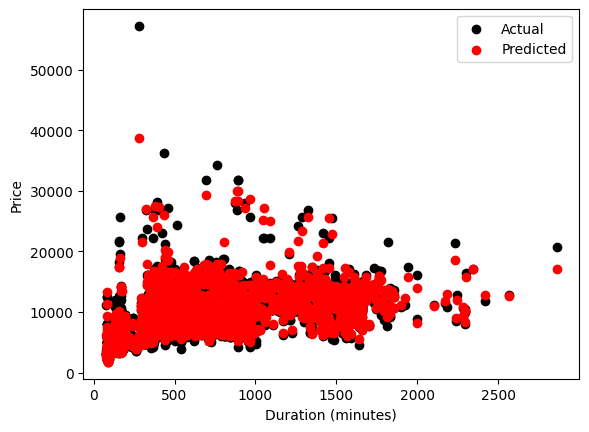

In [8]:
#plot predictions vs actual prices x axis duration y axis price
import matplotlib.pyplot as plt
plt.scatter(X_test['Duration_Minutes'], y_test, color='black', label='Actual')
plt.scatter(X_test['Duration_Minutes'], y_pred, color='red', label='Predicted')
plt.xlabel('Duration (minutes)')
plt.ylabel('Price')
plt.legend()
plt.show()


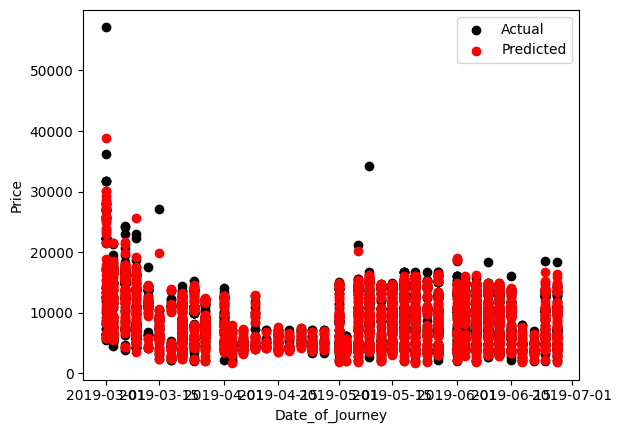

In [9]:
#plot predictions vs actual prices x axis duration y axis price
import matplotlib.pyplot as plt
plt.scatter(X_test['Date_of_Journey'], y_test, color='black', label='Actual')
plt.scatter(X_test['Date_of_Journey'], y_pred, color='red', label='Predicted')
plt.xlabel('Date_of_Journey')
plt.ylabel('Price')
plt.legend()
plt.show()
